<a href="https://colab.research.google.com/github/Vicksdev2/olist-ecommerce-analysis/blob/main/proyect_olist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Brazilian E-Commerce Analysis

### ¿Cómo podemos optimizar la experiencia del cliente para maximizar la retención y el valor de vida?


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

orders = pd.read_csv('/content/drive/MyDrive/proyecto_olist_data/olist_orders_dataset.csv')
items = pd.read_csv('/content/drive/MyDrive/proyecto_olist_data/olist_order_items_dataset.csv')
products = pd.read_csv('/content/drive/MyDrive/proyecto_olist_data/olist_products_dataset.csv')
customers = pd.read_csv('/content/drive/MyDrive/proyecto_olist_data/olist_customers_dataset.csv')
reviews = pd.read_csv('/content/drive/MyDrive/proyecto_olist_data/olist_order_reviews_dataset.csv')
print("¡Succesfully load!")

print("Initial Dimentions:")
print(f"Orders: {orders.shape}")
print(f"Items: {items.shape}")
print(f"Customers: {customers.shape}")
print(f"Reviews: {reviews.shape}")

¡Succesfully load!
Initial Dimentions:
Orders: (99441, 8)
Items: (112650, 7)
Customers: (99441, 5)
Reviews: (99224, 7)


In [3]:
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

In [4]:
orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


## **MERGES**

In [6]:
# FIRST MERGE: ORDERS, ITEMS
data = orders.merge(items, on='order_id', how='left')
print(f"Number of rows after the merge: {data.shape[0]}")


Number of rows after the merge: 113425


In [7]:
#SECOND MERGE: PRODUCT
data = data.merge(products, on='product_id', how='left')

In [8]:
#THIRD MERGE: Customers
data = data.merge(customers, on='customer_id', how='left')

In [9]:
data = data.merge(reviews, on='order_id', how='left')

# Table visualization after the merge
print(f"Final dimentions df_complet: {data.shape}")
data.head()

Final dimentions df_complet: (114092, 32)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51


In [10]:

cols_fecha = ['order_purchase_timestamp', 'order_approved_at',
              'order_delivered_carrier_date', 'order_delivered_customer_date',
              'order_estimated_delivery_date']

# Convert to datetime
for col in cols_fecha:
    data[col] = pd.to_datetime(data[col])


data['year_month'] = data['order_purchase_timestamp'].dt.to_period('M')
data['year'] = data['order_purchase_timestamp'].dt.year
data['month'] = data['order_purchase_timestamp'].dt.month

### ANALYSIS

In [11]:
#DELIVERY TIMES
#How long is the delivery time? Are the estimated times met?

#Delivery days
data['Delivery_days'] = (data['order_delivered_customer_date'] - data['order_purchase_timestamp']).dt.days

# Calculate the difference between the estimate and the actual amount
data['Delay_vs_estimated'] =  (data['order_delivered_customer_date'] - data['order_estimated_delivery_date']).dt.days


#To display 1 if Its late, 0 if not.
data['is_late'] = data['Delay_vs_estimated'].apply(lambda x:1 if x > 0 else 0)
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,year_month,year,month,Delivery_days,Delay_vs_estimated,is_late
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2017-10,2017,10,8.0,-8.0,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,2018-07,2018,7,13.0,-6.0,0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,2018-08,2018,8,9.0,-18.0,0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,2017-11,2017,11,13.0,-13.0,0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51,2018-02,2018,2,2.0,-10.0,0


In [12]:
#Verifiying if there is any missing data
for col in data.columns:
  data_missing = np.mean(data[col].isnull())
  print('{} - {}%'.format(col, data_missing))

order_id - 0.0%
customer_id - 0.0%
order_status - 0.0%
order_purchase_timestamp - 0.0%
order_approved_at - 0.0014199067419275672%
order_delivered_carrier_date - 0.017354415734670267%
order_delivered_customer_date - 0.028512077972162816%
order_estimated_delivery_date - 0.0%
order_item_id - 0.006819058303824984%
product_id - 0.006819058303824984%
seller_id - 0.006819058303824984%
shipping_limit_date - 0.006819058303824984%
price - 0.006819058303824984%
freight_value - 0.006819058303824984%
product_category_name - 0.020948006871647443%
product_name_lenght - 0.020948006871647443%
product_description_lenght - 0.020948006871647443%
product_photos_qty - 0.020948006871647443%
product_weight_g - 0.006976825719594713%
product_length_cm - 0.006976825719594713%
product_height_cm - 0.006976825719594713%
product_width_cm - 0.006976825719594713%
customer_unique_id - 0.0%
customer_zip_code_prefix - 0.0%
customer_city - 0.0%
customer_state - 0.0%
review_id - 0.008423027030817236%
review_score - 0.00842

In [13]:
data.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,162
order_delivered_carrier_date,1980
order_delivered_customer_date,3253
order_estimated_delivery_date,0
order_item_id,778
product_id,778


In [14]:
#nulls percentage per columns

data.isnull().mean() * 100

,0
order_id,0.000000
customer_id,0.000000
order_status,0.000000
order_purchase_timestamp,0.000000
order_approved_at,0.141991
order_delivered_carrier_date,1.735442
order_delivered_customer_date,2.851208
order_estimated_delivery_date,0.000000
order_item_id,0.681906
product_id,0.681906


In [15]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114092 entries, 0 to 114091
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114092 non-null  object        
 1   customer_id                    114092 non-null  object        
 2   order_status                   114092 non-null  object        
 3   order_purchase_timestamp       114092 non-null  datetime64[ns]
 4   order_approved_at              113930 non-null  datetime64[ns]
 5   order_delivered_carrier_date   112112 non-null  datetime64[ns]
 6   order_delivered_customer_date  110839 non-null  datetime64[ns]
 7   order_estimated_delivery_date  114092 non-null  datetime64[ns]
 8   order_item_id                  113314 non-null  float64       
 9   product_id                     113314 non-null  object        
 10  seller_id                      113314 non-null  object        
 11  

In [16]:
print(f'Dupicados {data.duplicated().sum()}')

Dupicados 0


In [17]:
data = data[data['order_status'] == 'delivered']
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,year_month,year,month,Delivery_days,Delay_vs_estimated,is_late
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2017-10,2017,10,8.0,-8.0,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,2018-07,2018,7,13.0,-6.0,0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,2018-08,2018,8,9.0,-18.0,0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,2017-11,2017,11,13.0,-13.0,0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51,2018-02,2018,2,2.0,-10.0,0


#### CUSTOMERS ANALYSIS

###### Who are the customers who have purchased the most in terms of the amount spent?


In [18]:
customer_data = data.groupby('customer_unique_id').agg({
    'price': 'sum',
    'order_id': 'count'
}).sort_values(by = 'price', ascending=False)

customer_data.columns = ['Total_sum', 'Purchase_frequency']
customer_data.head()

,Total_sum,Purchase_frequency
customer_unique_id,,
0a0a92112bd4c708ca5fde585afaa872,13440.0,8
da122df9eeddfedc1dc1f5349a1a690c,7388.0,2
763c8b1c9c68a0229c42c9fc6f662b93,7160.0,4
dc4802a71eae9be1dd28f5d788ceb526,6735.0,1
459bef486812aa25204be022145caa62,6729.0,1


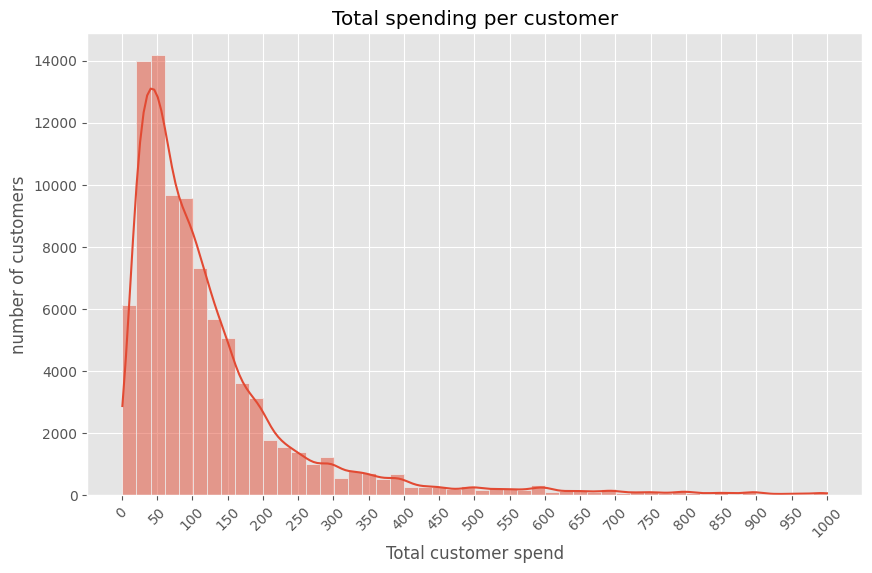

In [19]:
subset_data = customer_data[customer_data['Total_sum'] < 1000]

plt.figure(figsize=(10, 6))
sns.histplot(subset_data['Total_sum'], bins=50, kde=True)
plt.xticks(range(0, 1001, 50), rotation=45)
plt.title('Total spending per customer')
plt.xlabel('Total customer spend')
plt.ylabel('number of customers')
plt.show()


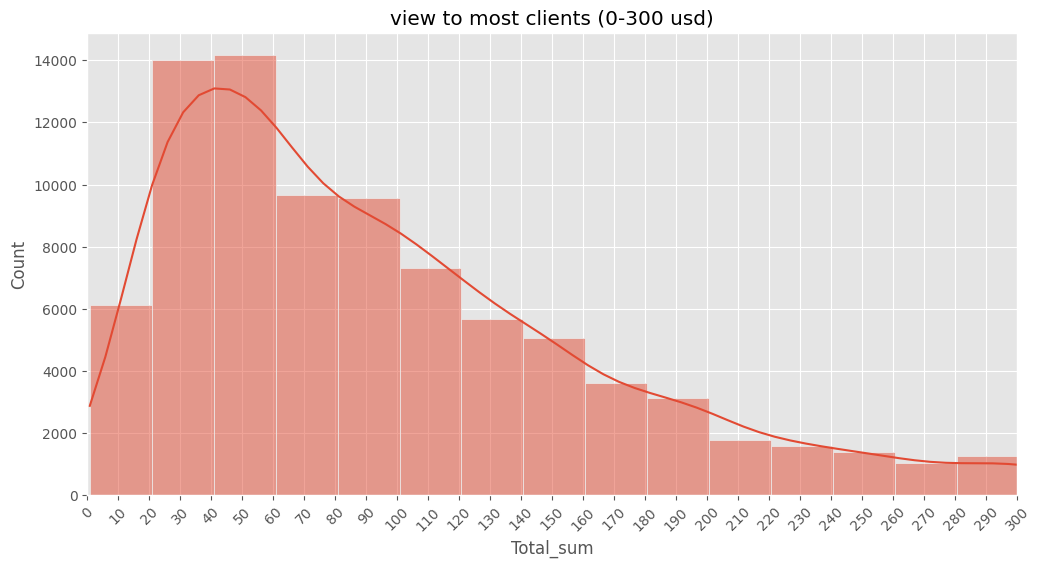

In [20]:
plt.figure(figsize=(12, 6))
sns.histplot(subset_data['Total_sum'], bins=50, kde=True)
plt.xlim(0, 300)
plt.xticks(range(0, 301, 10), rotation=45)

plt.title('view to most clients (0-300 usd)')
plt.show()



######How often do customers buy?



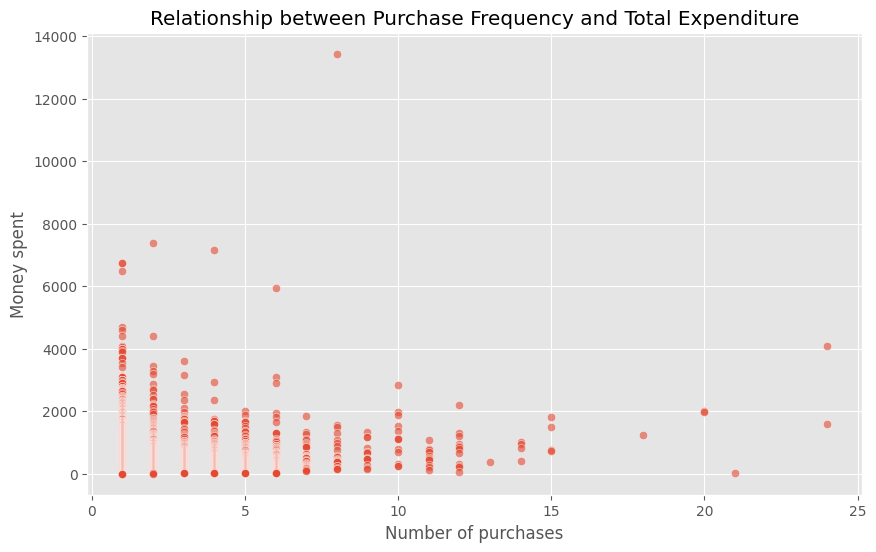

In [21]:


plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='Purchase_frequency', y='Total_sum', alpha=0.6)

plt.title('Relationship between Purchase Frequency and Total Expenditure')
plt.xlabel('Number of purchases')
plt.ylabel('Money spent')
plt.show()

##### WHERE ARE THE CUSTOMERS LOCATED?